<a href="https://colab.research.google.com/github/RyuJungSoo/2022_winter_ai_study/blob/main/%EC%98%A4%ED%86%A0%EC%9D%B8%EC%BD%94%EB%8D%94_%EC%8B%A4%EC%8A%B5%ED%95%98%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Reshape

import matplotlib.pyplot as plt
import numpy as np

In [2]:
# MNIST 데이터 셋을 호출
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32') / 255

In [3]:
# 생성자 모델 만들기
autoencoder = Sequential()

# 인코딩 부분
autoencoder.add(Conv2D(16, kernel_size = 3, padding = 'same', input_shape=(28,28,1), activation='relu'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size =3, activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=2, padding='same'))
autoencoder.add(Conv2D(8, kernel_size=3, strides=2, padding='same', activation='relu'))

# 디코딩 부분
autoencoder.add(Conv2D(8, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, padding='same', activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(16, kernel_size=3, activation='relu'))
autoencoder.add(UpSampling2D())
autoencoder.add(Conv2D(1, kernel_size=3, padding='same', activation='sigmoid'))

In [4]:
# 전체 구조 확인
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 8)           5

In [5]:
# 컴파일 및 학습을 하는 부분
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(X_train, X_train, epochs=50, batch_size=128, validation_data=(X_test, X_test))

# 학습된 결과를 출력하는 부분
random_test = np.random.randint(X_test.shape[0], size=5)

Epoch 1/50
469/469 [==============================] - 7s 8ms/step - loss: 0.1907 - val_loss: 0.1276
Epoch 2/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1182 - val_loss: 0.1098
Epoch 3/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1067 - val_loss: 0.1023
Epoch 4/50
469/469 [==============================] - 3s 7ms/step - loss: 0.1010 - val_loss: 0.0980
Epoch 5/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0975 - val_loss: 0.0949
Epoch 6/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0950 - val_loss: 0.0930
Epoch 7/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0930 - val_loss: 0.0913
Epoch 8/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0915 - val_loss: 0.0899
Epoch 9/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0903 - val_loss: 0.0887
Epoch 10/50
469/469 [==============================] - 3s 7ms/step - loss: 0.0893 - val_loss: 0.0879

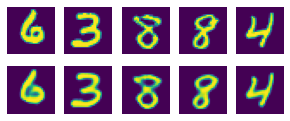

In [6]:
# 테스트할 이미지를 랜덤으로 호출
ae_imgs = autoencoder.predict(X_test) # 앞서 만든 오토인코더 모델에 넣기

plt.figure(figsize=(7,2)) # 출력 이미지 크기 정하기

for i, image_idx in enumerate(random_test):
  # 랜덤으로 뽑은 이미지를 차례로 나열
  ax = plt.subplot(2, 7, i+1)
  # 테스트할 이미지를 먼저 그대로 보여줌
  plt.imshow(X_test[image_idx].reshape(28, 28))
  ax.axis('off')
  ax = plt.subplot(2, 7, 7+i+1)
  # 오토인코딩 결과를 다음 열에 입력
  plt.imshow(ae_imgs[image_idx].reshape(28,28))
  ax.axis('off')
plt.show()